In [1]:
import numpy as np


class LogisticRegression:
    def __init__(self):
        self.alpha = None

    @staticmethod
    def __sigmoid(x: np.array) -> np.array:
        return 1 / (1 + np.exp(-x))

    def fit(
        self,
        x_train: np.array,
        y_train: np.array,
        lr: float,
        beta: float,
        num_epoch: int,
    ):
        alpha = np.ones(x_train.shape[1] + 1)
        X = np.concatenate((x_train, np.ones((x_train.shape[0], 1))), axis=1)

        for _ in range(num_epoch):
            y_pred = self.__sigmoid(np.matmul(X, alpha.T))
            gradient = np.matmul(
                X.T, ((1 - y_train) * y_pred - y_train * (1 - y_pred))
            )
            alpha = alpha - lr * (gradient + beta * alpha)

        self.alpha = alpha

    def predict(self, x_test: np.array):
        if self.alpha is None:
            raise Exception

        X = np.concatenate((x_test, np.ones((x_test.shape[0], 1))), axis=1)
        prediction = self.__sigmoid(np.matmul(X, self.alpha.T))
        return np.fromiter(map(int, prediction.round()), dtype=np.int32)
    
    def predict_proba(self, x_test: np.array):
        if self.alpha is None:
            raise Exception

        X = np.concatenate((x_test, np.ones((x_test.shape[0], 1))), axis=1)
        prediction = self.__sigmoid(np.matmul(X, self.alpha.T))
        return prediction

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем параметры визуализации
sns.set_theme()
# Генерируем выборки
class_1 = np.random.randn(100, 2)*0.6 + np.array([1.,1.])
class_2 = np.random.randn(100, 2)*0.6 - np.array([1.,1.])

X = np.concatenate([class_1, class_2])
y = np.array([0 if i<100 else 1 for i in range(200)])

In [5]:
cls = LogisticRegression()

cls.fit(X, y, 0.01, 0.0001, 20)

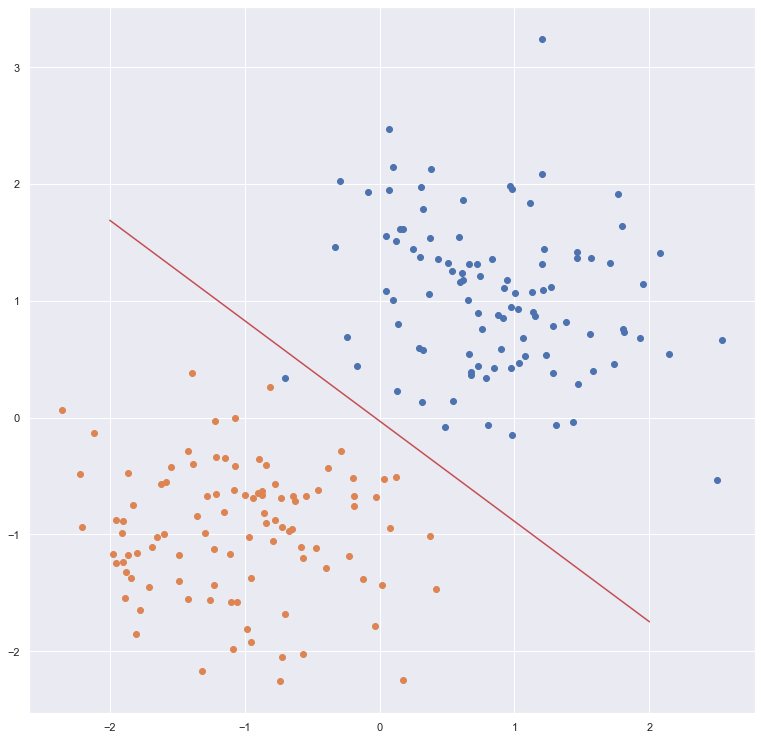

In [6]:
# Изобразим разделяющую гиперплоскость согласно обученной модели
x = np.array([-2,2])
y = -cls.alpha[0]/cls.alpha[1] * x + cls.alpha[2]

plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])
plt.plot(x, y, c='r')